In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
# %config InlineBackend.figure_formats = ['svg']
tab20b = plt.colormaps.get('tab20b')

In [2]:
def dat2arr(dat, Nx, Ny, dx, dy):
    runtime_arr = np.zeros([Nx, Ny])
    count = np.zeros([Nx, Ny])
    for d in dat:
        i = int(d[0]/dx) - 1
        j = int(d[1]/dy) - 1
        if i < Nx and j < Ny:
            runtime_arr[i, j] += d[2]
            count[i, j] += 1
    runtime_arr /= count
    return runtime_arr

In [3]:
## load data
fps_seq = np.loadtxt("../data/runtime_seq.txt")
fps_mpi = np.loadtxt("../data/runtime_mpi.txt")
fps_omp = np.loadtxt("../data/runtime_omp.txt")
fps_pth = np.loadtxt("../data/runtime_pth.txt")
fps_cu = np.loadtxt("../data/runtime_cuda.txt")

## define parameters
xstep = 50
ystep = 1
xmin  = int(min(fps_mpi[:, 0]) / xstep)
xmax  = int(max(fps_mpi[:, 0]) / xstep)
ymin  = int(min(fps_mpi[:, 1]) / ystep)
ymax  = int(max(fps_mpi[:, 1]) / ystep)
Nx    = xmax - xmin + 1
Ny    = ymax - ymin + 1
xticks = (xmin + np.array(list(range(Nx)))) * xstep
yticks = (ymin + np.array(list(range(Ny)))) * ystep
xticks = np.int64(xticks)
yticks = np.int64(yticks)

## define parameters (cuda)
xstep_cu = 1000
ystep_cu = 1
xmin_cu  = int(min(fps_cu[:, 0]) / xstep_cu)
xmax_cu  = int(max(fps_cu[:, 0]) / xstep_cu)
ymin_cu  = int(min(fps_cu[:, 1]) / ystep_cu)
ymax_cu  = int(max(fps_cu[:, 1]) / ystep_cu)
Nx_cu    = xmax_cu - xmin_cu + 1
Ny_cu    = ymax_cu - ymin_cu + 1
xticks_cu = (xmin_cu + np.array(list(range(Nx_cu)))) * xstep_cu
yticks_cu = (ymin_cu + np.array(list(range(Ny_cu)))) * ystep_cu
xticks_cu = np.int64(xticks_cu)
yticks_cu = np.int64(yticks_cu)

## convert data to arrays
fps_arr_seq = dat2arr(fps_seq, Nx, 1, xstep, 1)
fps_arr_mpi = dat2arr(fps_mpi, Nx, Ny, xstep, ystep)
fps_arr_omp = dat2arr(fps_omp, Nx, Ny, xstep, ystep)
fps_arr_pth = dat2arr(fps_pth, Nx, Ny, xstep, ystep)
fps_arr_cu  = dat2arr(fps_cu, Nx_cu, Ny_cu, xstep_cu, ystep_cu)

## calcualte speed-up rate
rate_arr_mpi = fps_arr_mpi / fps_arr_seq
rate_arr_omp = fps_arr_omp / fps_arr_seq
rate_arr_pth = fps_arr_pth / fps_arr_seq

## converg arrays to dataframes
fps_df_mpi = pd.DataFrame(fps_arr_mpi, columns=yticks, index=xticks)
fps_df_omp = pd.DataFrame(fps_arr_omp, columns=yticks, index=xticks)
fps_df_pth = pd.DataFrame(fps_arr_pth, columns=yticks, index=xticks)
rate_df_mpi = pd.DataFrame(rate_arr_mpi, columns=yticks, index=xticks)
rate_df_omp = pd.DataFrame(rate_arr_omp, columns=yticks, index=xticks)
rate_df_pth = pd.DataFrame(rate_arr_pth, columns=yticks, index=xticks)

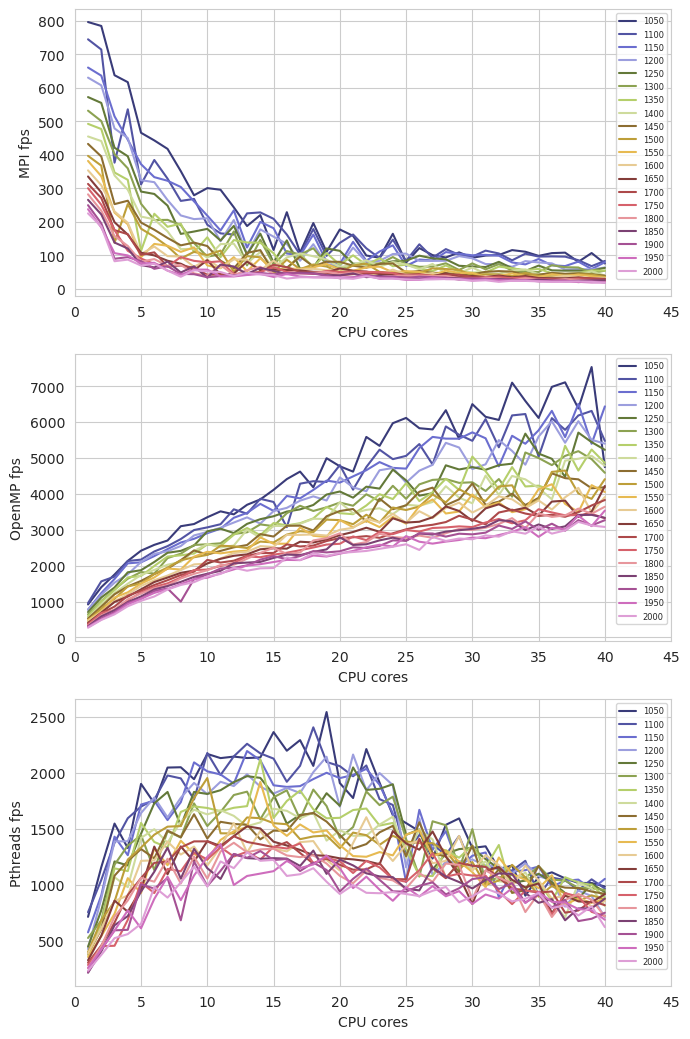

In [23]:
## fps vs core plot
start = 20
end = 40
fig, axes = plt.subplots(3, 1, figsize=[7, 10.5])
# axes[0].plot(xticks, runtime_arr_seq, label=str(1))
for i in range(start, end):
    axes[0].plot(list(yticks), fps_arr_mpi[i, :], label=str(xticks[i]), color=tab20b.colors[i%20])
    axes[2].plot(list(yticks), fps_arr_pth[i, :], label=str(xticks[i]), color=tab20b.colors[i%20])
    axes[1].plot(list(yticks), fps_arr_omp[i, :], label=str(xticks[i]), color=tab20b.colors[i%20])
for i in range(3):
    axes[i].legend(prop={'size': 6})
    axes[i].set_xlabel("CPU cores")
    axes[i].set_xlim(0, 45)
#     axes[i].set_ylim(0, 550)
axes[0].set_ylabel("MPI fps")
axes[2].set_ylabel("Pthreads fps")
axes[1].set_ylabel("OpenMP fps")
plt.tight_layout()
plt.savefig("fps-core-cpu.pdf", bbox_inches='tight')

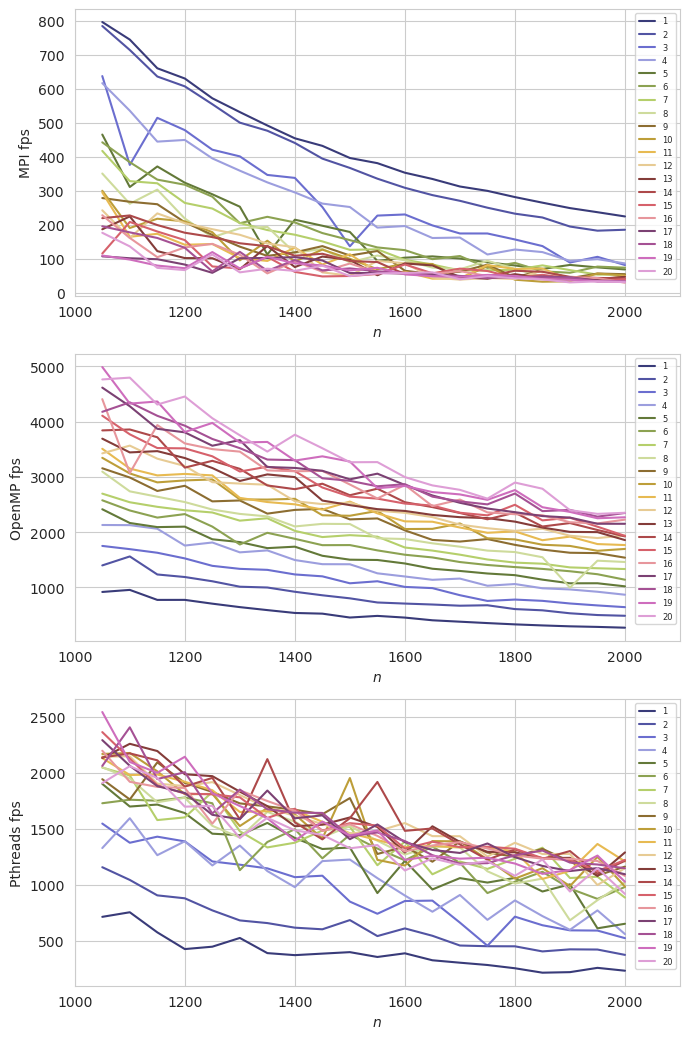

In [5]:
## fps vs size plot
start = 0
end = 20
n_start = 20

fig, axes = plt.subplots(3, 1, figsize=[7, 10.5])
# axes[0].plot(xticks, runtime_arr_seq, label=str(1))
for i in range(start, end):
    axes[0].plot(xticks[n_start:], fps_arr_mpi[n_start:, i], label=str(yticks[i]), color=tab20b.colors[i])
    axes[1].plot(xticks[n_start:], fps_arr_omp[n_start:, i], label=str(yticks[i]), color=tab20b.colors[i])
    axes[2].plot(xticks[n_start:], fps_arr_pth[n_start:, i], label=str(yticks[i]), color=tab20b.colors[i])
axes[0].legend(prop={'size': 6})
axes[0].set_xlabel("$n$")
axes[0].set_ylabel("MPI fps")
axes[1].legend(prop={'size': 6})
axes[1].set_xlabel("$n$")
axes[1].set_ylabel("OpenMP fps")
axes[2].legend(prop={'size': 6})
axes[2].set_xlabel("$n$")
axes[2].set_ylabel("Pthreads fps")
for i in range(3):
    axes[i].set_xlim(1000, 2100)
plt.tight_layout()
plt.savefig("fps-dim-cpu.pdf", bbox_inches='tight')

/home/shiroha/miniconda3/envs/qm/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


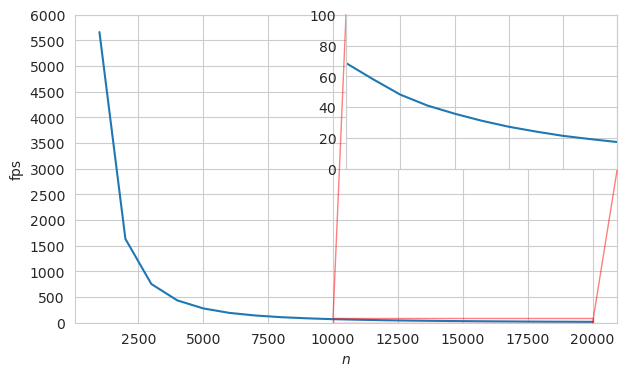

In [6]:
## fps vs size plot
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(xticks_cu, fps_arr_cu[:, 0])
ax.set_xlabel("$n$")
ax.set_ylabel("fps")
ax.set_ylim(0, 6000)
ax.set_yticks(range(0, 6001, 500))

# inset axes....
axins = ax.inset_axes([0.5, 0.5, 0.5, 0.5])
axins.plot(xticks_cu, fps_arr_cu[:, 0])
# sub region of the original image
x1, x2, y1, y2 = 10000, 20000, 0, 100
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels(range(0, 101, 20))
ax.indicate_inset_zoom(axins, edgecolor="red")

plt.savefig("fps-dim-gpu.pdf", bbox_inches='tight')

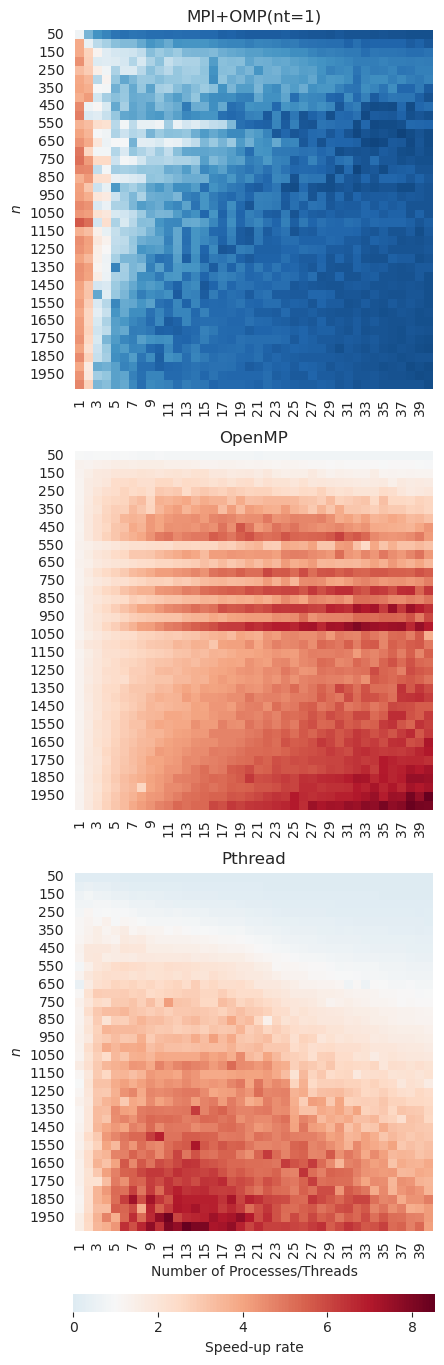

In [7]:
# rate heatmap
# fig, axes = plt.subplots(1, 4, figsize=(22, 4), gridspec_kw={'width_ratios':[1, 1,1,0.05]})
fig, axes = plt.subplots(4, 1, figsize=np.array([3.5, 11])*1.25, gridspec_kw={'height_ratios':[1, 1,1,0.05]})
axes[0] = sns.heatmap(rate_df_mpi, cmap="RdBu_r", vmin=0, center=1, cbar_kws={'label': 'Speed-up rate'}, cbar=False, square=True, ax=axes[0])
axes[0].set_ylabel("$n$")
axes[1].set_ylabel("$n$")
axes[1] = sns.heatmap(rate_df_omp, cmap="RdBu_r", vmin=0, center=1, cbar_kws={'label': 'Speed-up rate'}, cbar=False, square=True, ax=axes[1])
axes[2] = sns.heatmap(rate_df_pth, cmap="RdBu_r", vmin=0, center=1, cbar_kws={'label': 'Speed-up rate', "orientation": "horizontal"}, square=True, ax=axes[2], cbar_ax=axes[3])
axes[2].set_xlabel("Number of Processes/Threads")
axes[2].set_ylabel("$n$")
# axes[1].set_ylabel("Array size")

axes[0].set_title("MPI+OMP(nt=1)")
axes[1].set_title("OpenMP")
axes[2].set_title("Pthread")
plt.tight_layout()
plt.savefig("heatmap-rate-cpu.pdf", bbox_inches='tight')

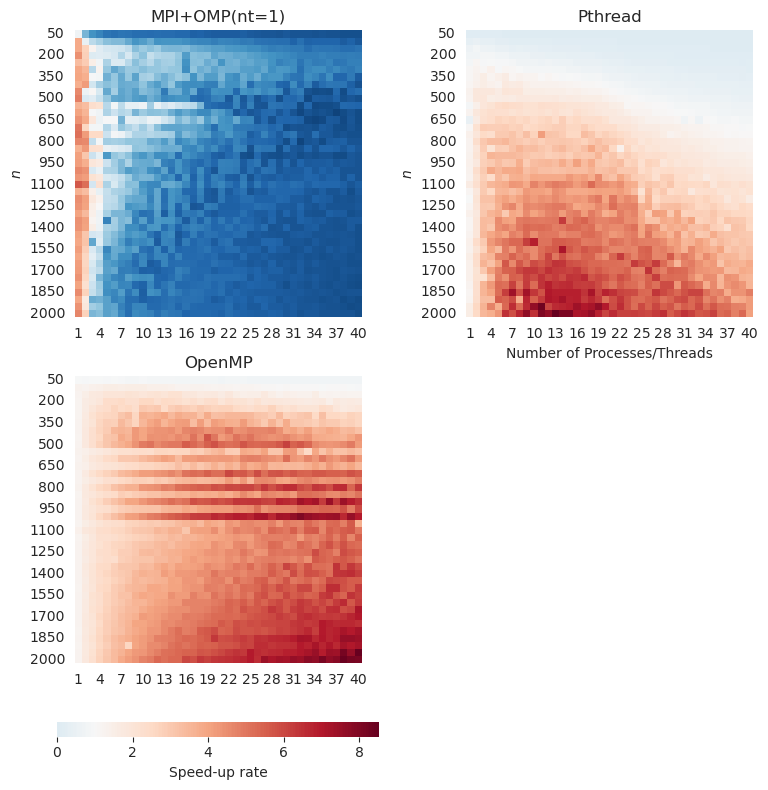

In [22]:
# rate heatmap
# fig, axes = plt.subplots(1, 4, figsize=(22, 4), gridspec_kw={'width_ratios':[1, 1,1,0.05]})
fig, axes = plt.subplots(3, 2, figsize=np.array([1, 1])*8, gridspec_kw={'height_ratios':[1, 1, 0.05]})
axes[0, 0] = sns.heatmap(rate_df_mpi, cmap="RdBu_r", vmin=0, center=1, cbar_kws={'label': 'Speed-up rate'}, cbar=False, square=True, ax=axes[0, 0])
axes[0, 0].set_ylabel("$n$")
axes[1, 0].set_ylabel("$n$")
axes[1, 0] = sns.heatmap(rate_df_omp, cmap="RdBu_r", vmin=0, center=1, cbar_kws={'label': 'Speed-up rate'}, cbar=False, square=True, ax=axes[1, 0])
axes[0, 1] = sns.heatmap(rate_df_pth, cmap="RdBu_r", vmin=0, center=1, cbar_kws={'label': 'Speed-up rate', "orientation": "horizontal"}, square=True, ax=axes[0, 1], cbar_ax=axes[2, 0])
axes[0, 1].set_xlabel("Number of Processes/Threads")
axes[0, 1].set_ylabel("$n$")
# axes[1].set_ylabel("Array size")
axes[1, 1].remove()
axes[2, 1].remove()

axes[0, 0].set_title("MPI+OMP(nt=1)")
axes[1, 0].set_title("OpenMP")
axes[0, 1].set_title("Pthread")
plt.tight_layout()
plt.savefig("heatmap-rate-cpu.pdf", bbox_inches='tight')